In [29]:
### Run this cell before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

ERROR: Error in library(GGally): there is no package called ‘GGally’


We have used the White Wine Quality data available. The first and foremost step is to gain direct access to the dataset. Here, we have downloaded the file.

In [41]:

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

download.file(url, destfile = "winequality-white.csv")
white_wine <- read_delim("winequality-white.csv", delim = ";")
white_wine
     

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity volatile acidity citric acid residual sugar chlorides
1    7.0           0.27             0.36        20.70          0.045    
2    6.3           0.30             0.34         1.60          0.049    
3    8.1           0.28             0.40         6.90          0.050    
4    7.2           0.23             0.32         8.50          0.058    
5    7.2           0.23             0.32         8.50          0.058    
6    8.1           0.28             0.40         6.90          0.050    
7    6.2           0.32             0.16         7.00          0.045    
8    7.0           0.27             0.36        20.70          0.045    
9    6.3           0.30             0.34         1.60          0.049    
10   8.1           0.22             0.43         1.50          0.044    
11   8.1           0.27             0.41         1.45          0.033    
12   8.6           0.23             0.40         4.20          0.035    
13   7.9           0.18             0.37         1.20          0.040    
14   6.6           0.16             0.40         1.50          0.044    
15   8.3           0.42             0.62        19.25          0.040    
16   6.6           0.17             0.38         1.50          0.032    
17   6.3           0.48             0.04         1.10          0.046    
18   6.2           0.66             0.48         1.20          0.029    
19   7.4           0.34             0.42         1.10          0.033    
20   6.5           0.31             0.14         7.50          0.044    
21   6.2           0.66             0.48         1.20          0.029    
22   6.4           0.31             0.38         2.90          0.038    
23   6.8           0.26             0.42         1.70          0.049    
24   7.6           0.67             0.14         1.50          0.074    
25   6.6           0.27             0.41         1.30          0.052    
26   7.0           0.25             0.32         9.00          0.046    
27   6.9           0.24             0.35         1.00          0.052    
28   7.0           0.28             0.39         8.70          0.051    
29   7.4           0.27             0.48         1.10          0.047    
30   7.2           0.32             0.36         2.00          0.033    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
4869 5.8           0.230            0.31         4.50          0.046    
4870 6.6           0.240            0.33        10.10          0.032    
4871 6.1           0.320            0.28         6.60          0.021    
4872 5.0           0.200            0.40         1.90          0.015    
4873 6.0           0.420            0.41        12.40          0.032    
4874 5.7           0.210            0.32         1.60          0.030    
4875 5.6           0.200            0.36         2.50          0.048    
4876 7.4           0.220            0.26         1.20          0.035    
4877 6.2           0.380            0.42         2.50          0.038    
4878 5.9           0.540            0.00         0.80          0.032    
4879 6.2           0.530            0.02         0.90          0.035    
4880 6.6           0.340            0.40         8.10          0.046    
4881 6.6           0.340            0.40         8.10          0.046    
4882 5.0           0.235            0.27        11.75          0.030    
4883 5.5           0.320            0.13         1.30          0.037    
4884 4.9           0.470            0.17         1.90          0.035    
4885 6.5           0.330            0.38         8.30          0.048    
4886 6.6           0.340            0.40         8.10          0.046    
4887 6.2           0.210            0.28         5.70          0.028    
4888 6.2           0.410            0.22         1.90          0.023    
4889 6.8           0.220            0.36         1.20          0.052    
4890 4.9           0.235            0.27        11.75          0.030    
4891 6.1           0.340            0.29         2.20          

We then factor the quality, and view the dataset for further analysis.

In [42]:
white_wine <- white_wine |>
    mutate(quality = as_factor(quality))

View(white_wine)

fixed acidity volatile acidity citric acid residual sugar chlorides
1    7.0           0.27             0.36        20.70          0.045    
2    6.3           0.30             0.34         1.60          0.049    
3    8.1           0.28             0.40         6.90          0.050    
4    7.2           0.23             0.32         8.50          0.058    
5    7.2           0.23             0.32         8.50          0.058    
6    8.1           0.28             0.40         6.90          0.050    
7    6.2           0.32             0.16         7.00          0.045    
8    7.0           0.27             0.36        20.70          0.045    
9    6.3           0.30             0.34         1.60          0.049    
10   8.1           0.22             0.43         1.50          0.044    
11   8.1           0.27             0.41         1.45          0.033    
12   8.6           0.23             0.40         4.20          0.035    
13   7.9           0.18             0.37         1.20          0.040    
14   6.6           0.16             0.40         1.50          0.044    
15   8.3           0.42             0.62        19.25          0.040    
16   6.6           0.17             0.38         1.50          0.032    
17   6.3           0.48             0.04         1.10          0.046    
18   6.2           0.66             0.48         1.20          0.029    
19   7.4           0.34             0.42         1.10          0.033    
20   6.5           0.31             0.14         7.50          0.044    
21   6.2           0.66             0.48         1.20          0.029    
22   6.4           0.31             0.38         2.90          0.038    
23   6.8           0.26             0.42         1.70          0.049    
24   7.6           0.67             0.14         1.50          0.074    
25   6.6           0.27             0.41         1.30          0.052    
26   7.0           0.25             0.32         9.00          0.046    
27   6.9           0.24             0.35         1.00          0.052    
28   7.0           0.28             0.39         8.70          0.051    
29   7.4           0.27             0.48         1.10          0.047    
30   7.2           0.32             0.36         2.00          0.033    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
4869 5.8           0.230            0.31         4.50          0.046    
4870 6.6           0.240            0.33        10.10          0.032    
4871 6.1           0.320            0.28         6.60          0.021    
4872 5.0           0.200            0.40         1.90          0.015    
4873 6.0           0.420            0.41        12.40          0.032    
4874 5.7           0.210            0.32         1.60          0.030    
4875 5.6           0.200            0.36         2.50          0.048    
4876 7.4           0.220            0.26         1.20          0.035    
4877 6.2           0.380            0.42         2.50          0.038    
4878 5.9           0.540            0.00         0.80          0.032    
4879 6.2           0.530            0.02         0.90          0.035    
4880 6.6           0.340            0.40         8.10          0.046    
4881 6.6           0.340            0.40         8.10          0.046    
4882 5.0           0.235            0.27        11.75          0.030    
4883 5.5           0.320            0.13         1.30          0.037    
4884 4.9           0.470            0.17         1.90          0.035    
4885 6.5           0.330            0.38         8.30          0.048    
4886 6.6           0.340            0.40         8.10          0.046    
4887 6.2           0.210            0.28         5.70          0.028    
4888 6.2           0.410            0.22         1.90          0.023    
4889 6.8           0.220            0.36         1.20          0.052    
4890 4.9           0.235            0.27        11.75          0.030    
4891 6.1           0.340            0.29         2.20          

Then we make a quick scatter plot visualization of sulphates versus alcohol colored by quality. We chose these both predictors based off of study provided by the author Cortez, where he mentioned these two being the most influential predictors in determining wine quality.This, will further strengthen our understanding of the data set and choice of predictors.  

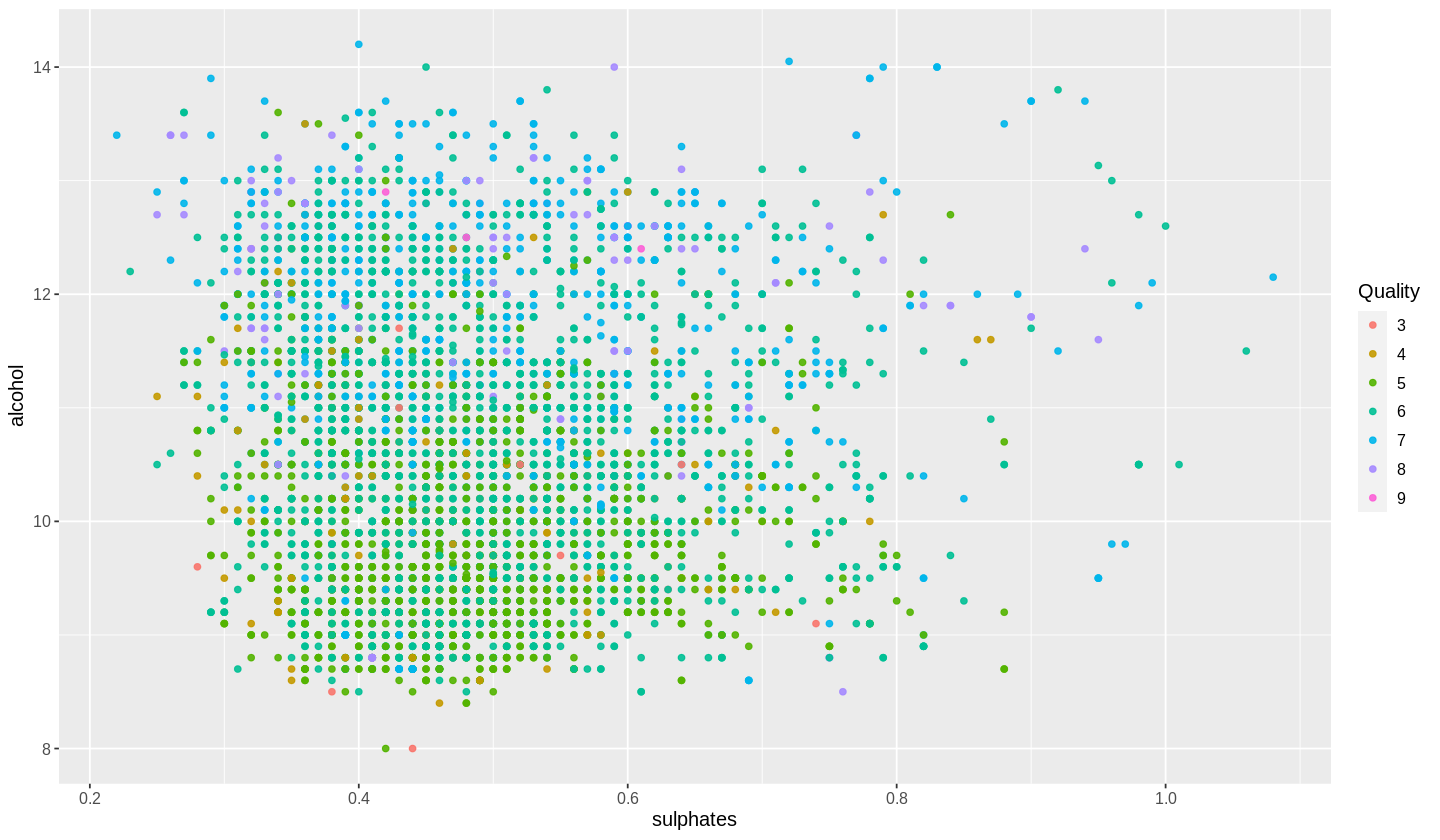

In [32]:
white_wine_plot <- white_wine |>
  ggplot(aes(x = sulphates, y = alcohol, color = quality)) +
  geom_point(alpha = 0.9) +
  labs(color = "Quality") +
  #scale_color_manual(labels = c("4", "5", "6", "7", "8"), 
   #                  values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 12))

white_wine_plot

As visible from the graph, there are a lot more green/blue dots indicating the large presence of medium quality wine ranging (5,6,7) while there are not that many red/pink/purple points indicating low proportions of very low and high quality wine.

Next, we split the data into Training and Testing Sets.

The trick is to SPLIT UP the data set into a TRAINING SET and TEST SET, and only show the classifier the TRAINING SET when building the classifier.
Then to evaluate the accuracy of the classifier, we can use it to predict the labels (which we know) in the test set.
If our predictions match the true labels for the observations in the TEST SET very well, then we have some confidence that our classifier might also do a good job of predicting the class labels for NEW observations that we do not have the class labels for.

Here, we have split them into 75% and 25% range.

In [43]:
set.seed(1234)

ww_split <- initial_split(white_wine, prop = 0.75, strata = quality)
ww_train <- training(ww_split)
ww_test <- testing(ww_split)

glimpse(ww_train)

Rows: 3,673
Columns: 12
$ `fixed acidity`        <dbl> 8.6, 8.3, 6.5, 6.8, 5.8, 7.3, 6.2, 6.9, 7.0, 6.…
$ `volatile acidity`     <dbl> 0.230, 0.420, 0.310, 0.260, 0.270, 0.240, 0.460…
$ `citric acid`          <dbl> 0.40, 0.62, 0.14, 0.42, 0.20, 0.39, 0.25, 0.35,…
$ `residual sugar`       <dbl> 4.20, 19.25, 7.50, 1.70, 14.95, 17.95, 4.40, 5.…
$ chlorides              <dbl> 0.035, 0.040, 0.044, 0.049, 0.044, 0.057, 0.066…
$ `free sulfur dioxide`  <dbl> 17.0, 41.0, 34.0, 41.0, 22.0, 45.0, 62.0, 32.0,…
$ `total sulfur dioxide` <dbl> 109.0, 172.0, 133.0, 122.0, 179.0, 149.0, 207.0…
$ density                <dbl> 0.9947, 1.0002, 0.9955, 0.9930, 0.9962, 0.9999,…
$ pH                     <dbl> 3.14, 2.98, 3.22, 3.47, 3.37, 3.21, 3.25, 3.36,…
$ sulphates              <dbl> 0.53, 0.67, 0.50, 0.48, 0.37, 0.36, 0.52, 0.48,…
$ alcohol                <dbl> 9.7, 9.7, 9.5, 10.5, 10.2, 8.6, 9.8, 9.8, 10.5,…
$ quality                <fct> 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5,…


We can use group_by and summarize to find the percentage of for each quality measure (3,4,5,6,7,8,9)  in ww_train and we see that they vary widely but 3 and 9 constitute the least amount while 5,6,7 hold a major share with 6 being the highest, indicating that our class proportions were roughly preserved when we split the data.

In [34]:
ww_proportions <- ww_train |>
                      group_by(quality) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(ww_train))
ww_proportions

quality n    percent   
1 3         14  0.3811598
2 4        121  3.2943098
3 5       1091 29.7032399
4 6       1650 44.9224068
5 7        665 18.1050912
6 8        129  3.5121154
7 9          3  0.0816771

An additional consideration we need to take when doing this is that we should create the standardization preprocessor using only the training data. This ensures that our test data does not influence any aspect of our model training. Once we have created the standardization preprocessor, we can then apply it separately to both the training and test data sets.



In [44]:
set.seed(1)

ww_recipe <- recipe(quality ~ sulphates + alcohol, data = ww_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Now that we have split our original data set into training and test sets, we can create our  
K-nearest neighbors classifier with only the training set using the technique we learned in the previous chapter. For now, we will just choose the number K of neighbors to be 3, and use sulphates and alcohol as the predictors. We then create a model specification, combine the model specification and recipe into a workflow, and then finally use fit with the training data ww_train to build the classifier.



In [36]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(ww_recipe) |>
  add_model(knn_spec) |>
  fit(data = ww_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4222706
Best kernel: rectangular
Best k: 3

We have a K-nearest neighbors classifier object, we can use it to predict the class labels for our test set. We use the bind_cols to add the column of predictions to the original test data, creating the ww_test_predictions data frame. The quality variable contains the true diagnoses, while the .pred_class contains the predicted quality from the classifier.

In [37]:
ww_test_predictions <- predict(knn_fit, ww_test) |>
  bind_cols(ww_test)

ww_test_predictions

.pred_class fixed acidity volatile acidity citric acid residual sugar
1    5           6.3           0.300            0.34         1.60         
2    6           8.1           0.270            0.41         1.45         
3    6           7.9           0.180            0.37         1.20         
4    6           7.4           0.340            0.42         1.10         
5    7           6.2           0.660            0.48         1.20         
6    6           6.4           0.310            0.38         2.90         
7    5           7.6           0.670            0.14         1.50         
8    6           7.0           0.280            0.39         8.70         
9    6           7.4           0.270            0.48         1.10         
10   5           8.5           0.240            0.39        10.40         
11   5           6.2           0.120            0.34         1.50         
12   7           7.3           0.280            0.43         1.70         
13   6           6.5           0.390            0.23         5.40         
14   5           7.3           0.240            0.39        17.95         
15   7           6.6           0.240            0.27         1.40         
16   5           7.4           0.180            0.31         1.40         
17   5           6.8           0.200            0.59         0.90         
18   6           7.4           0.200            0.36         1.20         
19   5           6.8           0.220            0.24         4.90         
20   6           6.0           0.190            0.26        12.40         
21   6           6.7           0.230            0.31         2.10         
22   5           8.6           0.230            0.46         1.00         
23   5           7.4           0.180            0.30         8.80         
24   6           6.9           0.240            0.33         1.70         
25   6           7.1           0.260            0.29        12.40         
26   7           8.6           0.265            0.36         1.20         
27   5           7.1           0.120            0.32         9.60         
28   5           6.5           0.170            0.54         8.50         
29   5           7.2           0.270            0.46        18.75         
30   5           7.2           0.310            0.50        13.30         
⋮    ⋮           ⋮             ⋮                ⋮           ⋮             
1196 6           6.4           0.105            0.29         1.10         
1197 6           6.4           0.105            0.29         1.10         
1198 6           5.7           0.330            0.32         1.40         
1199 5           5.8           0.360            0.50         1.00         
1200 7           6.2           0.760            0.01         3.20         
1201 5           6.1           0.410            0.20        12.60         
1202 5           5.8           0.360            0.50         1.00         
1203 6           6.8           0.230            0.48         1.50         
1204 5           5.8           0.290            0.27         1.60         
1205 6           5.9           0.370            0.30         1.50         
1206 6           6.5           0.280            0.38         7.80         
1207 6           5.3           0.275            0.24         7.40         
1208 6           5.2           0.405            0.15         1.45         
1209 7           6.8           0.340            0.36         8.90         
1210 6           5.6           0.340            0.25         2.50         
1211 5           6.6           0.380            0.29         2.40         
1212 6           7.0           0.360            0.35         2.50         
1213 6           7.5           0.380            0.33         9.20         
1214 5           6.4           0.350            0.51         7.80         
1215 3           6.0           0.430            0.34         7.60         
1216 7           5.3           0.600            0.34         1.40         
1217 6           5.8          

Finally, we  assess our classifier’s accuracy. To do this we use the metrics function from tidymodels to get the statistics about the quality of our model, specifying the truth and estimate arguments.

In [38]:
ww_test_predictions |>
  metrics(truth = quality, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric  .estimator .estimate
1 accuracy multiclass 0.4693878

Looking at the value of the .estimate variable shows that the estimated accuracy of the classifier on the test data was 46.93%.

We  also look at the confusion matrix for the classifier, which shows the table of predicted labels and correct labels, using the conf_mat function.

In [39]:
confusion <- ww_test_predictions |>
             conf_mat(truth = quality, estimate = .pred_class)
confusion

          Truth
Prediction   3   4   5   6   7   8   9
         3   0   0   0   1   1   0   0
         4   0   1  16  17   2   0   0
         5   1  15 230 203  40   8   1
         6   5  21  96 264  94  14   1
         7   0   4  15  53  66  10   0
         8   0   1   9  10  12  14   0
         9   0   0   0   0   0   0   0

The confusion matrix shows 575 observations were correctly predicted. It also shows that the classifier made some mistakes; in particular, it classified 650 wrong.

In [40]:
ww_proportions

quality n    percent   
1 3         14  0.3811598
2 4        121  3.2943098
3 5       1091 29.7032399
4 6       1650 44.9224068
5 7        665 18.1050912
6 8        129  3.5121154
7 9          3  0.0816771

Since, 5,6,7 quality value represents the majority of the training data, the majority classifier would always predict that a new observation is of one of these values. The estimated accuracy of the majority classifier is usually fairly close to the majority class proportion in the training data. In this case, we would suspect that the majority classifier will have an accuracy of around 44%.

The K-nearest neighbors classifier we built does about the same, with an accuracy of 46%. Therefore, even though the accuracy improved upon the majority classifier, our critical analysis suggests that this classifier may not have appropriate performance for the application. 

In [45]:
set.seed(1)

ww_vfold <- vfold_cv(ww_train, v = 9, strata = quality)
gridvals <- tibble(neighbors = seq(1, 10))

##(5)##
ww_results <- workflow() |>
  add_recipe(ww_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = ww_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

Warning message:
“No tuning parameters have been detected, performance will be evaluated using the resamples with no tuning. Did you want to [tune()] parameters?”
! Fold1: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold5: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold6: internal:
  No observations were detected in `truth` for level(s): '3', '9'
  Computation will proceed by ignoring those levels.

! Fold7: internal:
  No observations were detected in `truth` for level(s): '3', '9'
  Computation will proceed by ignoring those levels.

! Fold8: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold9: internal:
  No

ERROR while rich displaying an object: Error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (10): y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_t

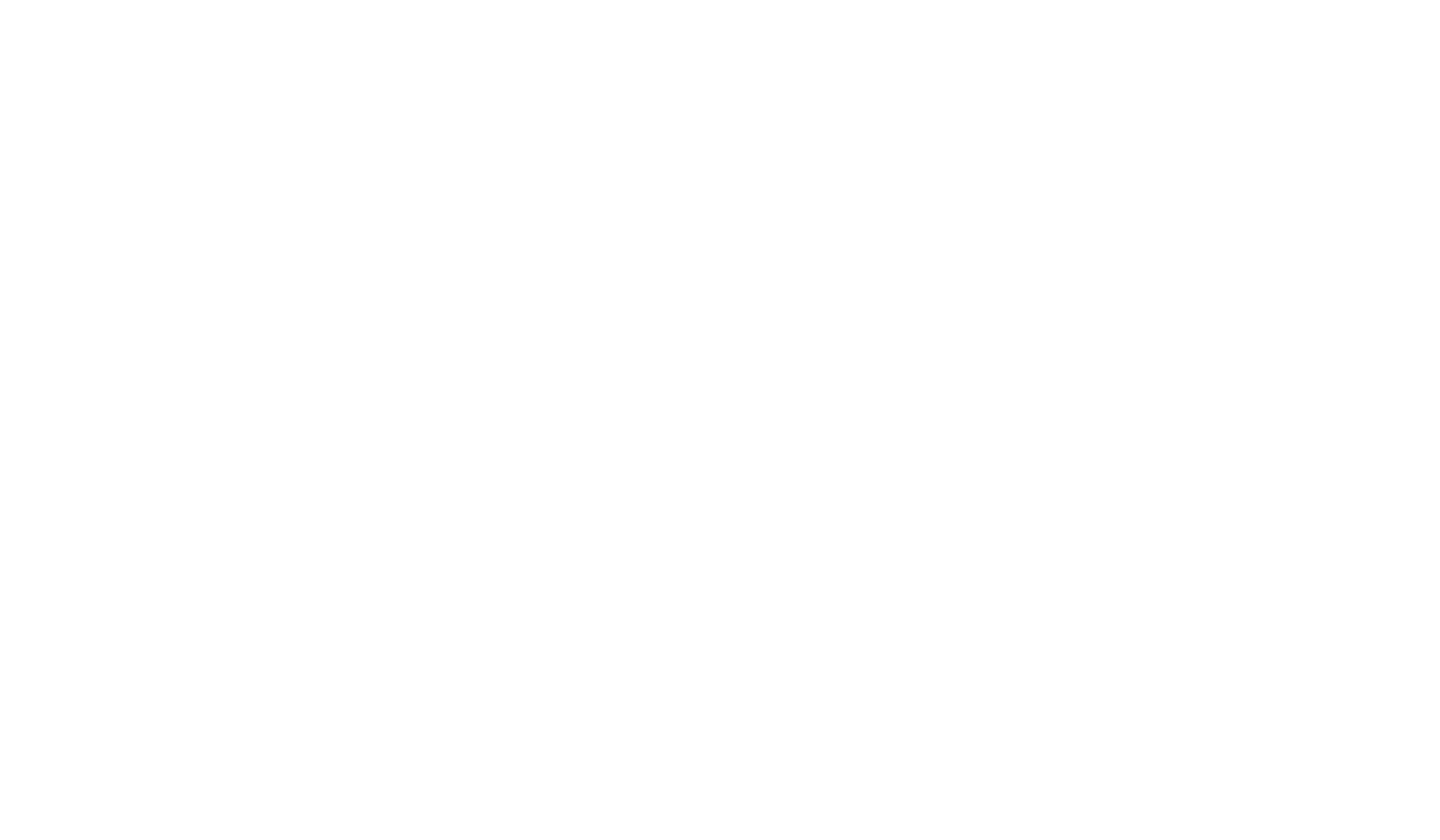

In [22]:
options(repr.plot.width = 12, repr.plot.height = 7)

ky <- ww_results |>
    filter(neighbors == 13) |>
    select(mean) |>
    pull()

cross_val_plot <- ww_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 13, colour = "red") +
    geom_point(aes(x = 13, y = ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "Estimated Accuracies of k Neighbours") +
    scale_x_continuous(limits = c(1, 25),
                       breaks = seq(1, 25),
                       minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

In [15]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
  set_engine("kknn") |>
  set_mode("classification")

ww_fit <- workflow() |>
  add_recipe(ww_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = ww_train)

##(8)##
# Get the prediction column
ww_predictions <- predict(ww_fit, ww_test) |> 
    bind_cols(ww_test)

ww_predictions

.pred_class fixed acidity volatile acidity citric acid residual sugar
1    5           6.3           0.30             0.34        1.60          
2    6           8.1           0.27             0.41        1.45          
3    6           7.9           0.18             0.37        1.20          
⋮    ⋮           ⋮             ⋮                ⋮           ⋮             
1223 5           6.6           0.34             0.40        8.1           
1224 6           6.2           0.41             0.22        1.9           
1225 6           6.5           0.23             0.38        1.3           
     chlorides free sulfur dioxide total sulfur dioxide density pH   sulphates
1    0.049     14                  132                  0.9940  3.30 0.49     
2    0.033     11                   63                  0.9908  2.99 0.56     
3    0.040     16                   75                  0.9920  3.18 0.63     
⋮    ⋮         ⋮                   ⋮                    ⋮       ⋮    ⋮        
1223 0.046     68                  170                  0.99494 3.15 0.50     
1224 0.023      5                   56                  0.98928 3.04 0.79     
1225 0.032     29                  112                  0.99298 3.29 0.54     
     alcohol quality
1     9.5    6      
2    12.0    5      
3    10.8    5      
⋮    ⋮       ⋮      
1223  9.55   6      
1224 13.00   7      
1225  9.70   5

In [16]:
# Compare the accuracy of predictions to the true values in the test set
ww_acc <- ww_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |>
    select(.metric, .estimate) |> 
    head(1)

ww_acc

.metric  .estimate
1 accuracy 0.4612245

In [17]:
# Compare the predictions to the true values in a confusion matrix
ww_cm <- ww_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)
ww_cm

          Truth
Prediction   3   4   5   6   7   8   9
         3   0   0   0   0   0   0   0
         4   0   0   0   0   0   0   0
         5   1  17 178 158  28   3   0
         6   5  20 160 326 127  25   1
         7   0   5  24  63  59  16   1
         8   0   0   4   1   1   2   0
         9   0   0   0   0   0   0   0